<b>1</b> OBTENCIÓN DE DATOS

In [1]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
import math

data= definirCorrelacionVariables.getDataFromDataBase()
dataframeTrain,datosTrain,dictGeneralTrain = definirCorrelacionVariables.generarMatrizDatos(data,True)

data= definirCorrelacionVariables.getDataFromDataBaseTest()
dataframeTest,datosTest,dictGeneralTest = definirCorrelacionVariables.generarMatrizDatos(data,False)

VolumenImage : 2.963 
altura : 174.000 
VolumenImage : 2.255 
altura : 184.000 
VolumenImage : 2.666 
altura : 171.000 
VolumenImage : 1.361 
altura : 133.000 
VolumenImage : 1.429 
altura : 168.000 
VolumenImage : 0.827 
altura : 130.000 
VolumenImage : 2.304 
altura : 167.000 
VolumenImage : 1.886 
altura : 186.000 
VolumenImage : 1.133 
altura : 135.000 
VolumenImage : 1.533 
altura : 120.000 
VolumenImage : 0.802 
altura : 135.000 
VolumenImage : 1.124 
altura : 120.000 
VolumenImage : 1.653 
altura : 155.000 
VolumenImage : 1.227 
altura : 120.000 
VolumenImage : 2.347 
altura : 175.000 
VolumenImage : 1.813 
altura : 163.000 
VolumenImage : 1.000 
altura : 140.000 
VolumenImage : 1.200 
altura : 150.000 
VolumenImage : 1.194 
altura : 153.000 
VolumenImage : 3.098 
altura : 195.000 
VolumenImage : 1.144 
altura : 145.000 
VolumenImage : 1.081 
altura : 150.000 
VolumenImage : 0.770 
altura : 149.000 
VolumenImage : 0.845 
altura : 123.000 
VolumenImage : 0.791 
altura : 115.000 


<b>2</b> pre PROCESAMIENTO DE DATA

In [2]:
dataframeTest[["maxHistBluVal"]]

,maxHistBluVal
0,2
1,2
2,2
3,2
4,2
...,...
1167,2
1168,2
1169,2
1170,2


3. OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

SE CALCULA LA VARIABLE EL IAF
$Ac = \pi*r*g $

$g = \sqrt(h^2 + r^2) $

Se tiene que $r = Di/2$

$Ac = \pi*r*\sqrt(h^2 + r^2)$

$Ac = \pi*\frac{Di}{4}*\sqrt(4*h^2 + Di^2)$

Diametro

$diameter = 2*\sqrt(\frac{area}{\pi})$

In [3]:


areaLateralTrain = []
volumeFromDiameterTrain= []
diametrosTrain=[]
for index,x in enumerate(datosTrain.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametrosTrain.append(diametro)
    altura= datosTrain.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameterTrain.append(valueVolume)
    areaLateralTrain.append(valueAreaLateral)
areaLateralTest = []
volumeFromDiameterTest = []
diametrosTest=[]
for index,x in enumerate(datosTest.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametrosTest.append(diametro)
    altura= datosTest.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameterTest.append(valueVolume)
    areaLateralTest.append(valueAreaLateral)


<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


In [4]:

IAF_from_volumeTrain = definirCorrelacionVariables.objective(datosTrain.datosVolumenImagen, 2.7791,0.0134)
IAF_from_areaTrain = definirCorrelacionVariables.objective(areaLateralTrain, 0.7896,-0.5786)
d = {"latArea":areaLateralTrain, "IAF_VOL":IAF_from_volumeTrain, "IAF_AREA":IAF_from_areaTrain}
dictGeneralTrain.update(d)
dframeFinalTrain = pd.DataFrame(data=dictGeneralTrain)

IAF_from_volumeTest = definirCorrelacionVariables.objective(datosTest.datosVolumenImagen, 2.7791,0.0134)
IAF_from_areaTest = definirCorrelacionVariables.objective(areaLateralTest, 0.7896,-0.5786)
d = {"latArea":areaLateralTest, "IAF_VOL":IAF_from_volumeTest, "IAF_AREA":IAF_from_areaTest}
dictGeneralTest.update(d)
dframeFinalTest = pd.DataFrame(data=dictGeneralTest)



Yield Promedio  5169.166319967175
Yield KG Por Planta  1.1889082535924502
16188.219415761552
0       0.173495
1       0.686574
2       0.350333
3       0.350333
4       0.149780
          ...   
1167    0.932201
1168    0.586097
1169    0.334389
1170    0.534505
1171    0.159242
Name: volImage, Length: 1172, dtype: float64


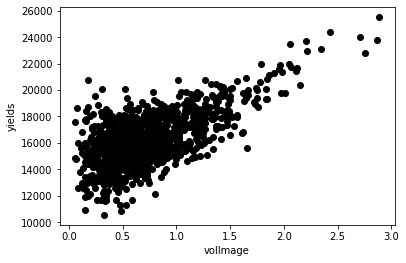

Total Granos Por Planta 16188.219415761552
Total Peso KG Pred Por Planta 3.723290465625157


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
dfsXtrain=dframeFinalTrain.loc[:,["volImage","criMax","ndviMean","maxBlue","latArea","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
dfsTest=dframeFinalTest.loc[:,["volImage","criMax","ndviMean","maxBlue","latArea","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
xTrain= dfsXtrain.values
yTrain = dframeFinalTrain.yields.values

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(xTrain,yTrain)

Y_pred_test=lr_multiple.predict(dfsTest.values)

print("Yield Promedio ",np.mean(yTrain))
print("Yield KG Por Planta ",np.mean(yTrain)*(0.00023))

print(np.sum(Y_pred_test)/Y_pred_test.size)

print(dfsTest["volImage"])

pyplot.scatter(dfsTest["volImage"],Y_pred_test,c="black")
pyplot.xlabel("volImage")
pyplot.ylabel("yields")

pyplot.show()

numberGrains = (np.mean(Y_pred_test))

pesoPorPlanta=numberGrains*(0.00023)
print("Total Granos Por Planta",numberGrains)
print("Total Peso KG Pred Por Planta",pesoPorPlanta)
